In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

On having a quick glance at the dataset, it can be found that PassengerId is unique for every passenger in the dataset. So, I will use it as an index

In [2]:
# Import training data and make PassengerId an index

train_data = pd.read_csv('/home/rohan/Documents/Machine_Learning/datasets/datasets/titanic_train.csv',index_col='PassengerId')
train_data[:4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From the information of the dataset it can be observed that Age, Cabin and Embarked columns has missing values. I will deal with those missing values later.

Let's 1st find how many male and female were present on titanic ship

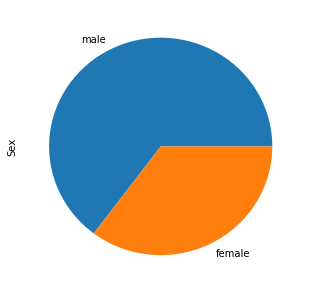

In [6]:
plt.figure(figsize=(5,5))
train_data.Sex.value_counts().plot(kind = 'pie')

So there were certainly more males that female on the ship. Let's find the exact number of males and females


In [7]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Now, let's find how many male and female survived

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


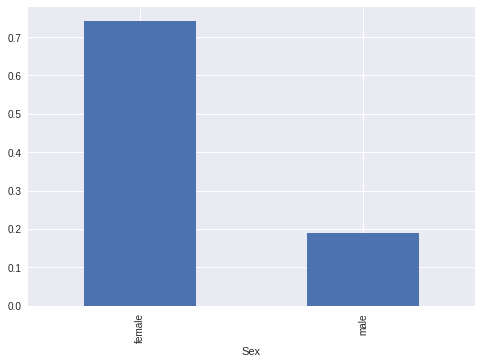

In [47]:
train_data.groupby('Sex').Survived.mean().plot(kind='bar')
print train_data.groupby('Sex').Survived.value_counts()

Though there we more male passengers as compared to female passengers, but still more females survived as compared to males

Now let's find how many people were travelling in 1st, 2nd and 3rd class

3    491
1    216
2    184
Name: Pclass, dtype: int64


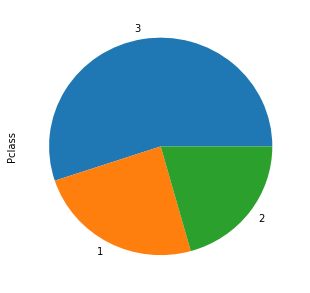

In [18]:
plt.figure(figsize=(5,5))
train_data.Pclass.value_counts().plot(kind='pie')
print train_data.Pclass.value_counts()

Ok! Now I know that there were more number of people belonging to the 3rd class. Infact more than 50% people were in 3rd class.

Now, let's see how many people travelling in 1st, 2nd, 3rd survived.

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


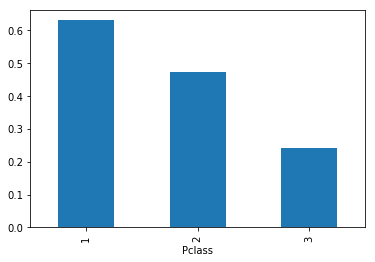

In [23]:
train_data.groupby('Pclass').Survived.mean().plot(kind='bar')
print train_data.groupby('Pclass').Survived.value_counts()

From the above two graphs it can be summarized that there were more people travelling in 3rd class as compared to 1st and 2nd class. But still, more people belonging to 1st class have survived and the people who belonged to 3rd class and survived are very less.

Maybe the 1st class passengers had an easy access to life saving boat or may be they where given higher preference.

Now let's observe the relationship between passenger belonging to different class, their sex and whether they survived or not.

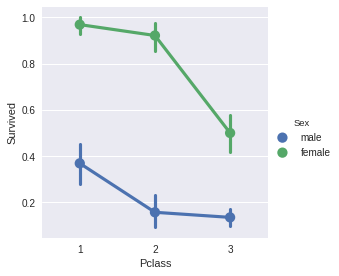

In [24]:
import seaborn as sns
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data)

Wow! This plot provides us with much bigger picture. Certainly, more female survived as compared to male, but the number of females who survived and belonged to 3rd class were more than the number of male who survived and belonged to 1st class. 

So we can say that there would have been an effort to save females first and then males.And also within this the priority were given to people belonging to higher class as can be observed from the above figure

Now we will analyze the number of people survived based on ticket fare

Mean ticket fare of people who didn't survived:  22.1178868852
Mean ticket fare of people who survived:  48.3954076023


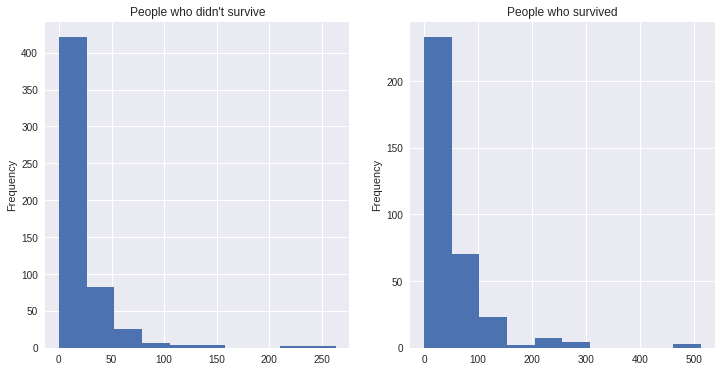

In [28]:
# Analyze the people who survived and not survived based on the ticket fare

not_survived_fare = train_data['Fare'][train_data['Survived']==0]
survived_fare = train_data['Fare'][train_data['Survived']==1]

plt.figure(figsize=(12,6))
plt.subplot(121)
not_survived_fare.plot(kind='hist',title = 'People who didn\'t survive')


plt.subplot(122)
survived_fare.plot(kind='hist', title= 'People who survived')

print 'Mean ticket fare of people who didn\'t survived: ', not_survived_fare.mean()
print 'Mean ticket fare of people who survived: ', survived_fare.mean()


So people who paid higher fare for the ticket, had greated chance of survival

People who survived: 
1    136
3    119
2     87
Name: Pclass, dtype: int64

People who didn't survived: 
3    372
2     97
1     80
Name: Pclass, dtype: int64


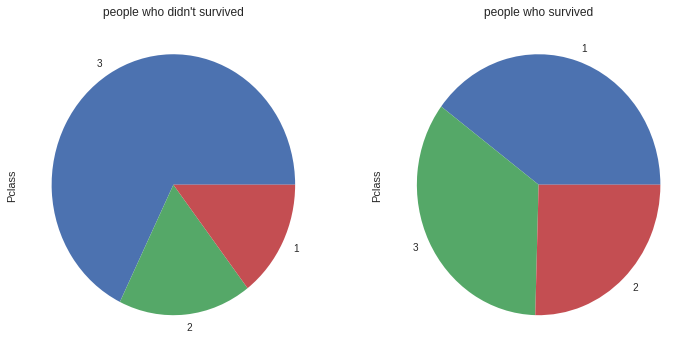

In [43]:
#Analyse People who survived and not survived based on their class

not_survived_class = train_data['Pclass'][train_data['Survived']==0]
survived_class = train_data['Pclass'][train_data['Survived']==1]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
not_survived_class.value_counts().plot(kind='pie', title='people who didn\'t survived')

plt.subplot(1,2,2)
survived_class.value_counts().plot(kind='pie', title='people who survived')

print 'People who survived: \n', survived_class.value_counts()
print '\nPeople who didn\'t survived: \n' ,not_survived_class.value_counts()

Above pie chart and numbers displayed above clearly shows the replationship between passengers who survived and the class to which they belonged.


In the 'name' category of dataset, only the title can be of use. Hence I will extract the title from the name

In [71]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

All the titles which have values less than 40 can be combined to one single group.

In [50]:
train_data['Titlecat'] = train_data['Title']
train_data.Titlecat.replace(to_replace= ['Dr','Rev','Col','Major','Mlle','Countess','Ms','Lady','Jonkheer','Don','Mme','Capt',
                                        'Sir'], value = 0, inplace=True)
train_data.Titlecat.replace('Mr',1,inplace=True)
train_data.Titlecat.replace('Miss',2,inplace=True)
train_data.Titlecat.replace('Mrs',3,inplace=True)
train_data.Titlecat.replace('Master',4,inplace=True)

In [69]:
survived_title = train_data['Titlecat'][train_data['Survived']==1]
print "Passenger with title Mr survived: ", survived_title.value_counts()[1]
print "Passenger with title Miss survived: ", survived_title.value_counts()[2]
print "Passenger with title Mrs survived: ", survived_title.value_counts()[3]
print "Passenger with title Master survived: ", survived_title.value_counts()[4]
print "Passenger with other titles survived: ", survived_title.value_counts()[0]




Passenger with title Mr survived:  81
Passenger with title Miss survived:  127
Passenger with title Mrs survived:  99
Passenger with title Master survived:  23
Passenger with other titles survived:  12


In [90]:
ratio_mr_survived = float(survived_title.value_counts()[1])/float(train_data.Titlecat.value_counts()[1])
ratio_miss_survived = float(survived_title.value_counts()[2])/float(train_data.Titlecat.value_counts()[2])
ratio_mrs_survived = float(survived_title.value_counts()[3])/float(train_data.Titlecat.value_counts()[3])
ratio_master_survived = float(survived_title.value_counts()[4])/float(train_data.Titlecat.value_counts()[4])
ratio_other_survived = float(survived_title.value_counts()[0])/float(train_data.Titlecat.value_counts()[0])

print 'Ratio of Mr survived: ',ratio_mr_survived
print 'Ratio of Miss survived: ',ratio_miss_survived
print 'Ratio of Mrs survived: ',ratio_mrs_survived
print 'Ratio of Master survived: ',ratio_master_survived
print 'Ratio of other survived: ',ratio_other_survived

Ratio of Mr survived:  0.15667311412
Ratio of Miss survived:  0.697802197802
Ratio of Mrs survived:  0.792
Ratio of Master survived:  0.575
Ratio of other survived:  0.444444444444


Ok! We can observe that female passengers with title Mrs has better ratio of survival as compared to female passengers with title Miss.

This can be because maybe married women with small children were give higher priority. Also the small boys were given priority as can be observed from the ratio of title Master

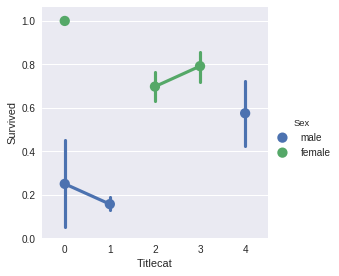

In [94]:
sns.factorplot('Titlecat','Survived',hue='Sex',data=train_data)

In this plot on x-axis, '0'- Other titles, '1'- Mr, '2'- 'Miss', '3' - Mrs, '4' - Master

So it is very clear from this plot that among male, small boys had higher survival rate and it is justifiable as they would have accompanied their mother. And also married women with small children would have been given higher priority.


Now let's consider Age column. First I will round up the age and then check it's correlation with other categories. I have used highly correlated categories to predict the missing values of Age

In [104]:
train_data['Age'] = train_data.Age.round()
train_data.corr().Age

Survived   -0.076834
Pclass     -0.369681
Age         1.000000
SibSp      -0.308006
Parch      -0.189045
Fare        0.096288
Titlecat   -0.288702
Name: Age, dtype: float64

I have now divided the columns of highly correlated categories based on Age. The readings which has the Age forms the part of training data and the ones for which age is not present for the part of test data for which age will be predicted.

In [105]:
X_train = train_data[train_data.Age.notnull()][['Pclass','SibSp','Titlecat']]
X_test = train_data[train_data.Age.isnull()][['Pclass','SibSp','Titlecat']]
y = train_data.Age.dropna()

The missing values of age is predicted using decision tree classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train.values, y.values)
prediction = dtree.predict(X_test)
agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age'])
train_data = train_data.combine_first(agePrediction)

Check if there is any missing values present in the age column

In [108]:
train_data.Age.isnull().sum()


0

Divide the data into different age groups

In [117]:
train_data['agebins'] = pd.cut(train_data['Age'],list(range(0,80,10)))


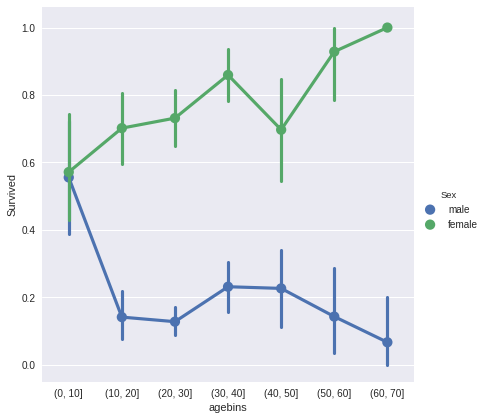

In [118]:
sns.factorplot("agebins", "Survived", hue="Sex", data=train_data,size=6)

The survival rate for male and female is almost same for age group of 0-10, as small children can be easily carried by their mother.


Let's see if departure place has any effect on survival of the passenger. It sounds pretty wierd but nothing should be concluded without analyzing the data.

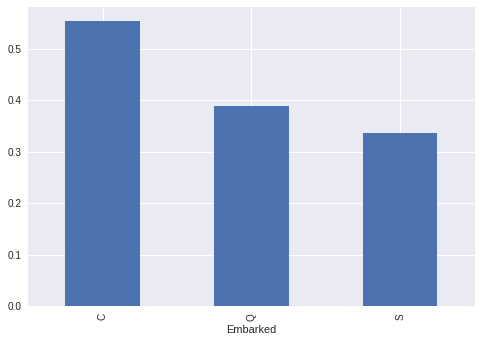

In [119]:
train_data.groupby('Embarked').Survived.mean().plot(kind='bar')

In this C - Cherbourg, Q - Queenstown, S - Southampton

Surprised! Let's see if Southampton had more males boarding as compared with Queenstown, and Cherbourg

In [120]:
train_data.groupby(['Embarked','Sex']).Name.count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Name, dtype: int64

Yes, I was right at my assumption. Southampton had more than double the number of males boarding as compared to females.

In [121]:
train_data.groupby(['Embarked','Pclass']).Name.count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Name, dtype: int64

It also seems that the more number of 1st class passengers boarded from Cherboug as compared to other classes.

Now, the remaining columns are  SibSp, Parch, Ticket, Cabin. As there information carried by Cabin, and ticket would be similar to the ones carried by Pclass and Fare. Hence we can avoid their analysis. Also the Cabin column contains around 687 missing values which is very large. It is difficult to say whether those missing values represent that passenger was not given any cabin or simply that data is not available.

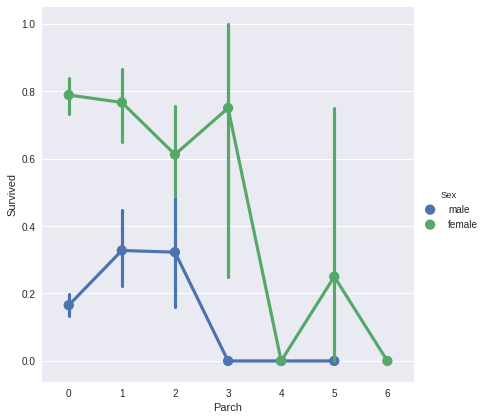

In [123]:
sns.factorplot("Parch", "Survived", hue="Sex", data=train_data,size=6)

Parch represents the number of parents and children accompanying the passenger.

There's a new finding here. Among the female passengers who died, they were the one's who were accompanied by more that 3 people including parents and children. 

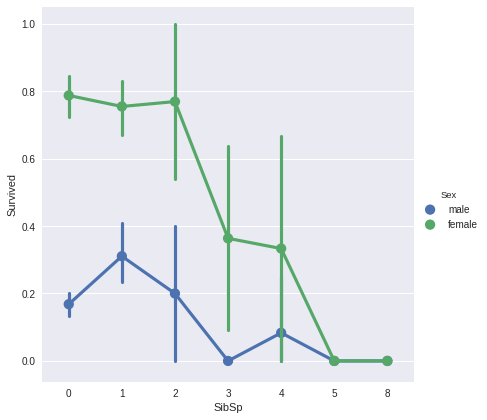

In [124]:
sns.factorplot("SibSp", "Survived", hue="Sex", data=train_data,size=6)

SibSp represents spouse/siblings
In this as well if the female passenger was accompanied by more than two people including spouse and siblings, their survival rate decreased.

# CONCLUSION

Many more informations can be extracted from this dataset. It all depends on our problem statements as to what sought of insights we would like to explore from the dataset at hand